In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Vengatesan-K/Retail-Sales-Forecasting/main/Data/stores_data_set.csv'

df_stores = pd.read_csv(url)

df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [14]:
url = 'https://raw.githubusercontent.com/Vengatesan-K/Retail-Sales-Forecasting/main/Data/Features_data_set.csv'

df_features = pd.read_csv(url)

df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
url = 'https://raw.githubusercontent.com/Vengatesan-K/Retail-Sales-Forecasting/main/Data/sales_data_set.csv'

df_sales = pd.read_csv(url)

df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [15]:
df_stores_features = df_stores.merge(right = df_features, on = 'Store')

df_merge = df_stores_features.merge(right = df_sales, on = ['Store', 'Date', 'IsHoliday'])
df_merge.sample(10)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
231014,24,A,203819,18/03/2011,43.39,3.796,NaN,NaN,NaN,NaN,NaN,133.849226,8.252,False,8,46913.37
210969,22,B,119557,04/03/2011,33.52,3.437,NaN,NaN,NaN,NaN,NaN,137.501703,8.458,False,44,4348.14
212495,22,B,119557,12/08/2011,74.69,3.880,NaN,NaN,NaN,NaN,NaN,140.085987,8.023,False,34,22007.97
50809,6,A,202505,20/08/2010,87.36,2.664,NaN,NaN,NaN,NaN,NaN,213.129143,6.973,False,29,7208.16
175568,18,B,120653,18/05/2012,62.31,3.899,9525.20,NaN,70.23,868.98,2396.74,138.106581,8.304,False,71,6360.35
388009,41,A,196321,06/01/2012,37.21,3.095,6453.63,22866.83,126.87,2582.41,4266.94,196.545831,6.589,False,28,419.42
343953,36,A,39910,23/09/2011,78.35,3.441,NaN,NaN,NaN,NaN,NaN,215.123319,8.177,False,9,47.72
416790,45,B,118221,24/06/2011,74.85,3.804,NaN,NaN,NaN,NaN,NaN,185.791961,8.521,False,36,3785.30
298458,31,A,203750,13/05/2011,75.04,3.899,NaN,NaN,NaN,NaN,NaN,215.612473,7.931,False,94,85591.70
375752,40,A,155083,27/05/2011,63.11,4.034,NaN,NaN,NaN,NaN,NaN,134.767774,4.781,False,91,36366.96


In [16]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [17]:
df_merge.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123
std,12.785297,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519
min,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [18]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

C:\Users\VENKA\AppData\Local\Temp\ipykernel_19496\40027698.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_merge['Date'] = pd.to_datetime(df_merge['Date'])


C:\Users\VENKA\AppData\Local\Temp\ipykernel_19496\4026912541.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_temp.corr(),annot=True)


<Axes: >

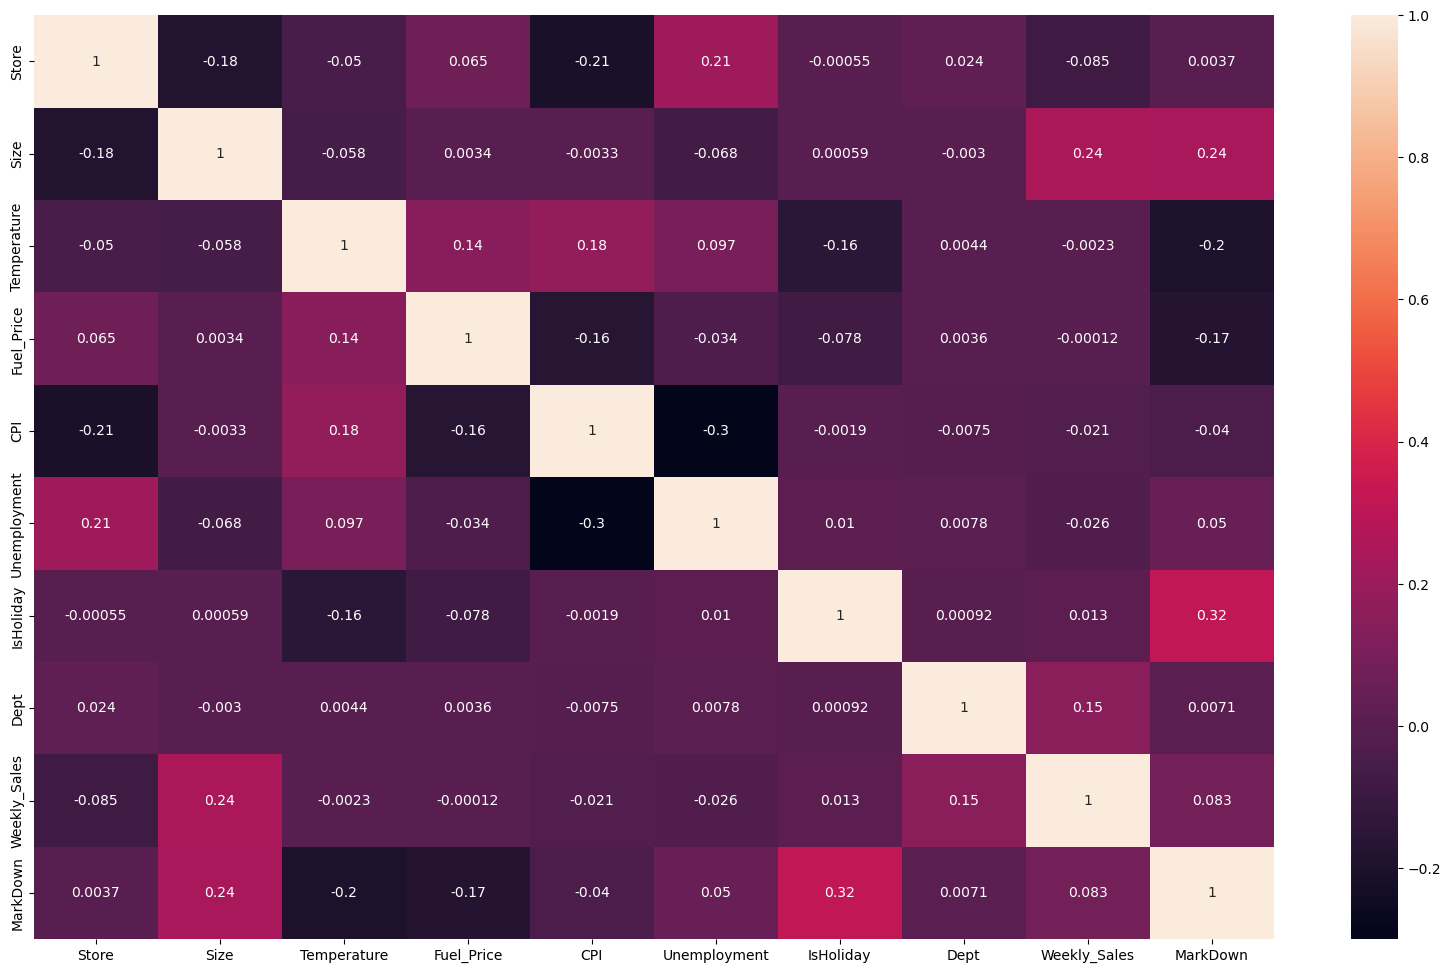

In [19]:
df_temp = df_merge.copy(deep=True)
df_temp['MarkDown'] = df_temp['MarkDown1'] + df_temp['MarkDown2'] +df_temp['MarkDown3'] +df_temp['MarkDown4'] + df_temp['MarkDown5']
df_temp.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True, axis = 1)
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_temp.corr(),annot=True)
# df_temp.head

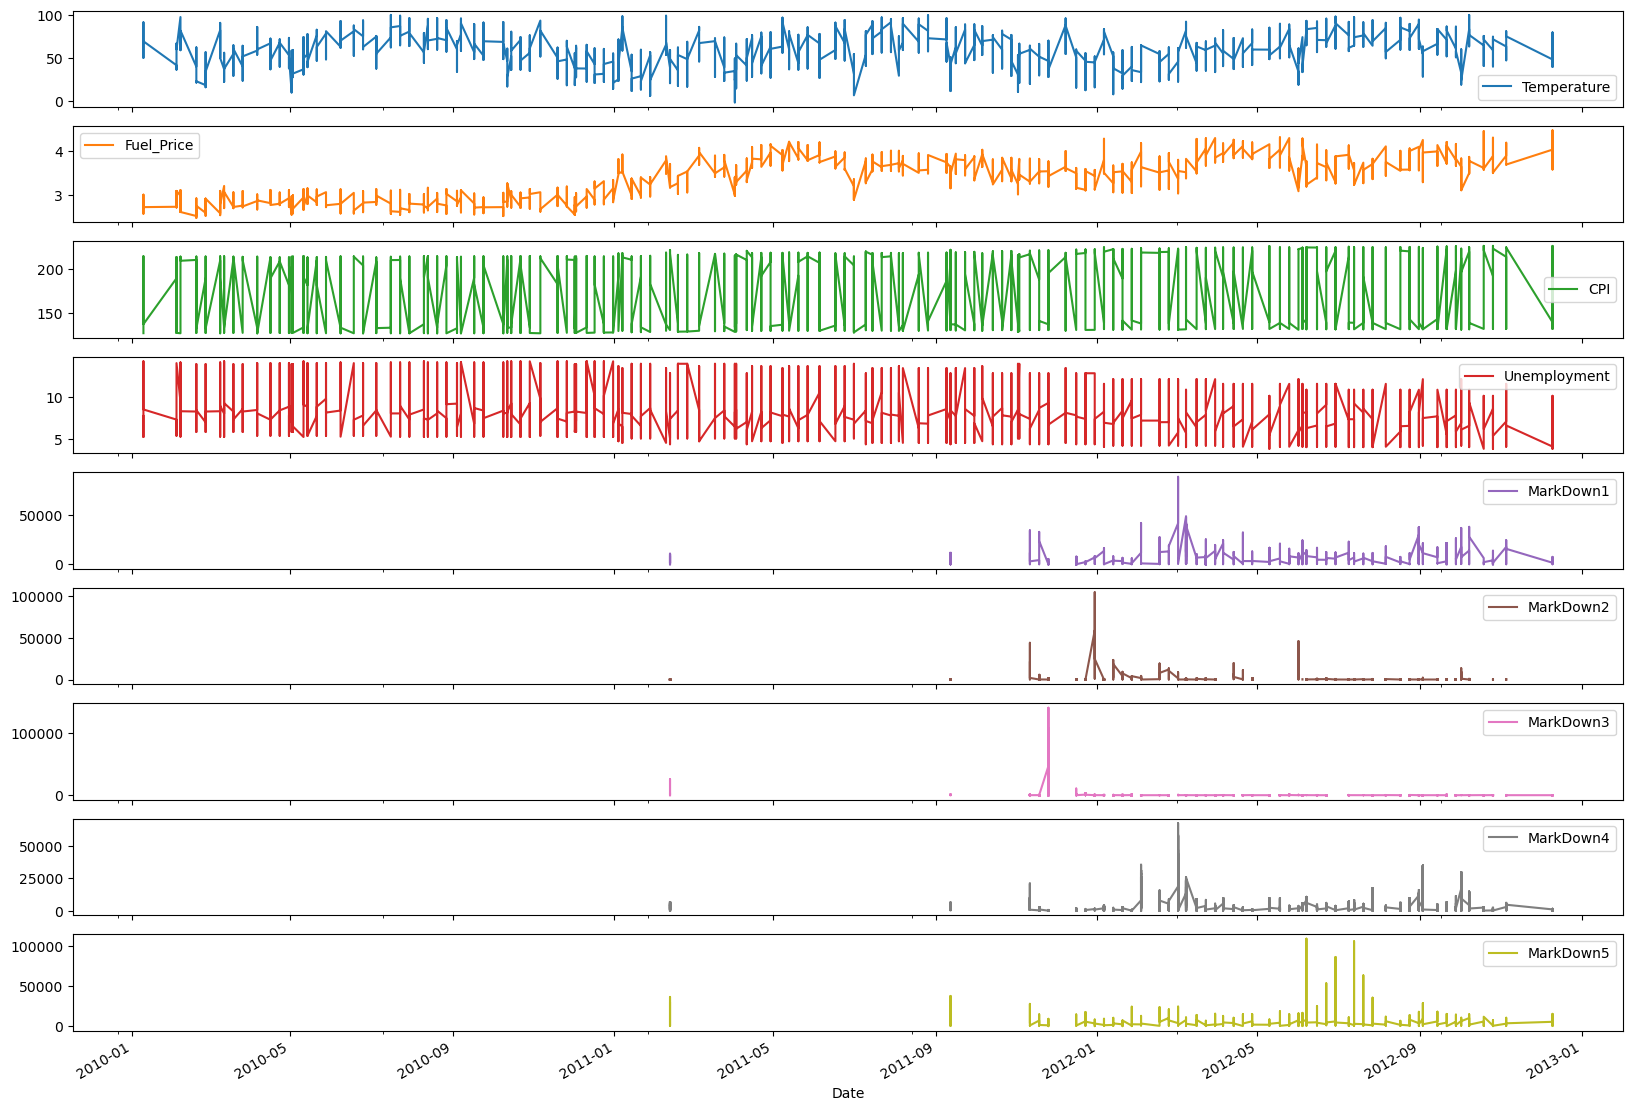

In [20]:
df_merge[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

C:\Users\VENKA\AppData\Local\Temp\ipykernel_19496\2994498410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_merge.groupby('Date').sum()['Weekly_Sales'].reset_index()


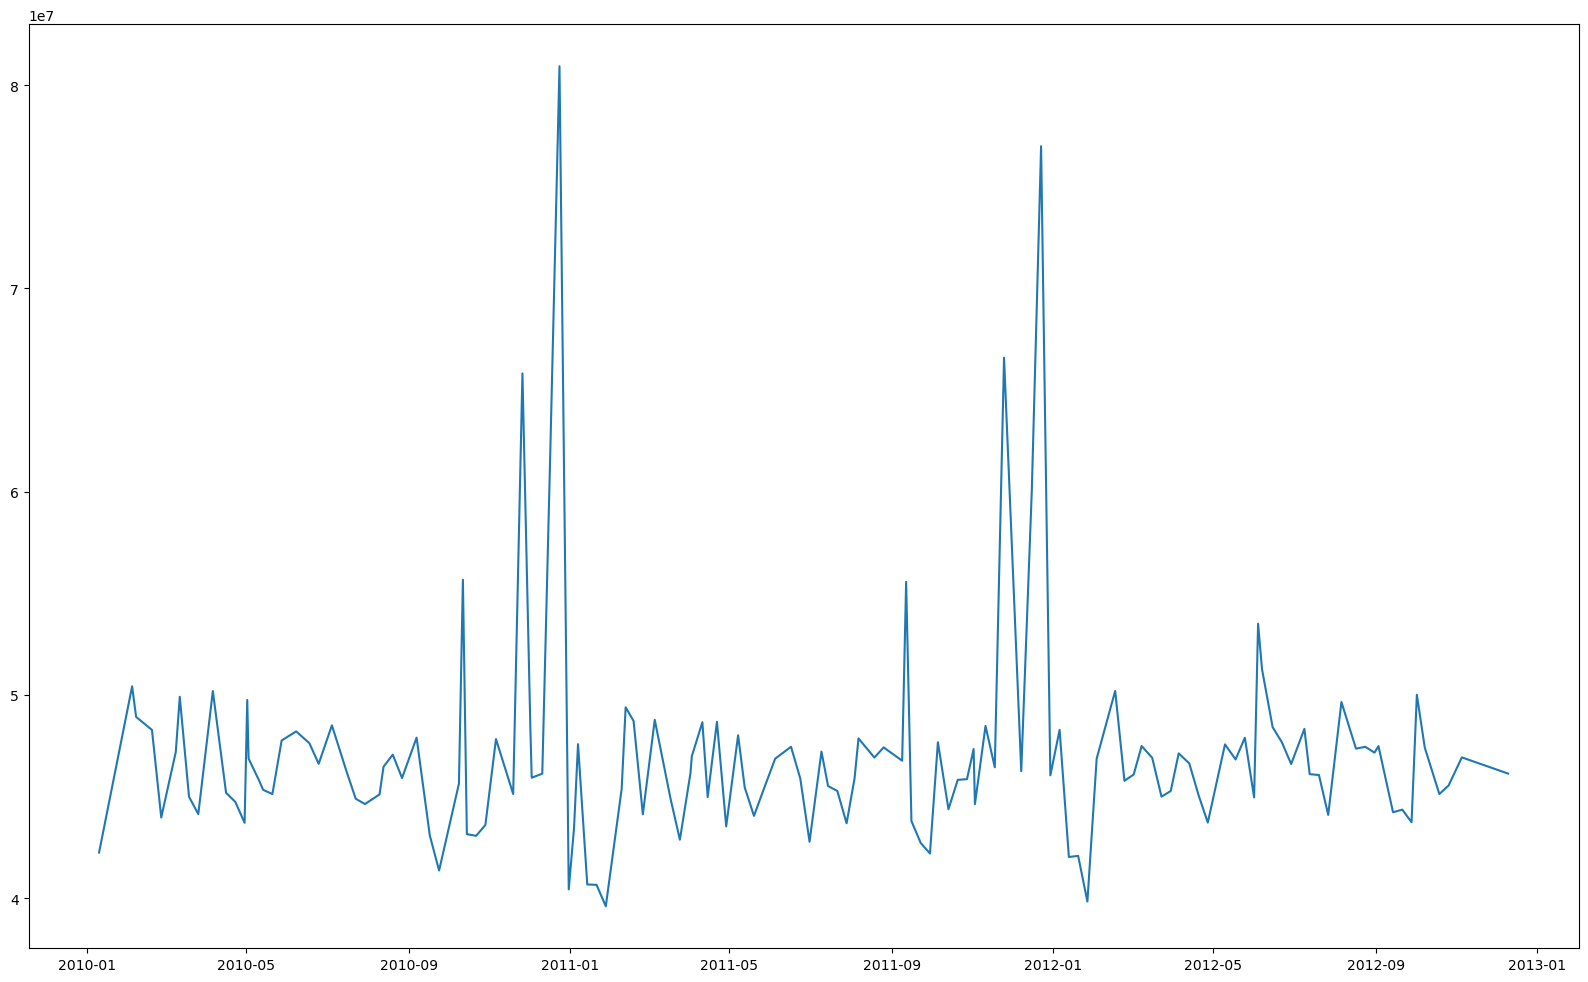

In [21]:
df_temp = df_merge.groupby('Date').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.plot('Date', 'Weekly_Sales', data=df_temp)

In [22]:
df_merge.Date.apply(lambda x: x.month)

0          5
1          5
2          5
3          5
4          5
          ..
421565    10
421566    10
421567    10
421568    10
421569    10
Name: Date, Length: 421570, dtype: int64

C:\Users\VENKA\AppData\Local\Temp\ipykernel_19496\849468817.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_merge.groupby(df_merge.Date.apply(lambda x: x.month)).sum()['Weekly_Sales'].reset_index()


Text(0, 0.5, 'Sales')

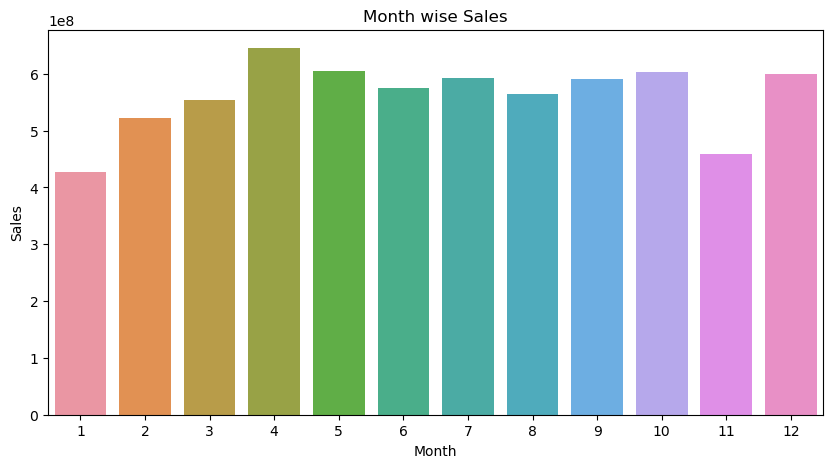

In [23]:
df_temp = df_merge.groupby(df_merge.Date.apply(lambda x: x.month)).sum()['Weekly_Sales'].reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=df_temp.Date,y=df_temp.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

C:\Users\VENKA\AppData\Local\Temp\ipykernel_19496\1827673561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp = df_merge.groupby('Type').sum()['Weekly_Sales'].reset_index()


<BarContainer object of 3 artists>

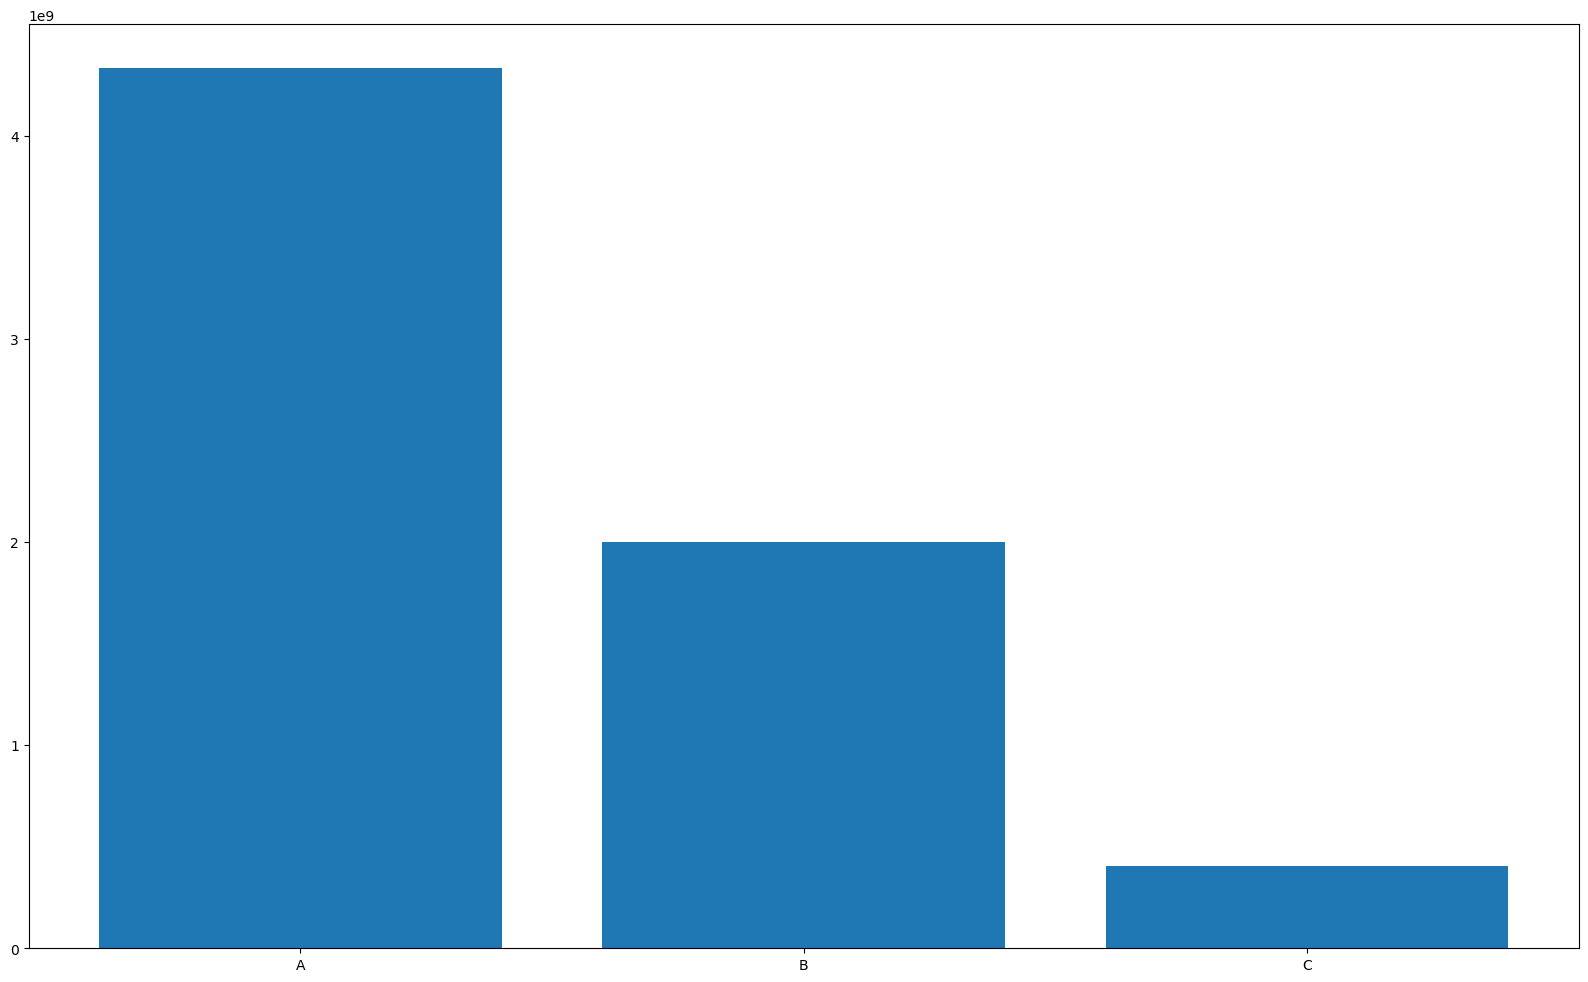

In [24]:
df_temp = df_merge.groupby('Type').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.bar('Type', 'Weekly_Sales', data=df_temp)

In [25]:
df_merge

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,B,118221,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,B,118221,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,B,118221,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,B,118221,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [26]:
df_merge[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df_merge[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)

df_merge.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-05-02,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38


In [28]:
df_merge.to_csv('retail_final.csv', index=False)